In [1]:
root = '/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/'

In [2]:
import os
train = os.path.join(root,'/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/sequences')
test = os.path.join(root,'/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/test/sequences')
path_sets = [train,test]

In [3]:
img_folder_paths=[]
for path, dirs, files in os.walk(path_sets[0]):
    for d in dirs:
      img_folder_paths.append(path_sets[0]+"/"+d)
print(len(img_folder_paths))

82


In [4]:
import matplotlib.pyplot as plt
import cv2

In [5]:

for img_folder_path in img_folder_paths:
  print(img_folder_path)
  for path, dirs, files in os.walk(img_folder_path):
    for img_path in files:
      img= cv2.imread(img_folder_path+"/"+img_path)
      print(img_path)
      annotation = img_path.replace('.jpg','')
      pos = 0
      for nbr in annotation:
        if nbr != '0':
          #print(nbr)
          annotation = annotation[pos:]
          break
        pos+=1
      #print(annotation)
      file_annota = open(img_folder_path.replace('sequences','annotations')+".txt", "r")
      print(img_folder_path.replace('sequences','annotations')+".txt")
      #plt.imshow(img)
      lines = file_annota.readlines()
      file_annota.close()
      for ligne in lines:
        #print(ligne.strip())
        line = ligne.strip()
        line = line.split(",")
        line = list(map(int, line))
        #print(line)
        if line[0] == int(annotation):
          #print(line[0], int(annotation))
          #plt.scatter([line[1]], line[2])
          img = cv2.circle(img,(line[1],line[2]), 5, (0,0,255), -1)
        
        
      break
  break
cv2.imwrite('sample.jpg', img)

/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/sequences/00031
00025.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt


True

In [6]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
from scipy import spatial
import json
from matplotlib import cm as CM
# from image import *
#from model import CSRNet
import torch
%matplotlib inline

In [7]:
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    print(pts)
    leafsize = 2048
    # build kdtree
    tree = spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [8]:
import time
for img_folder_path in img_folder_paths:
  print(img_folder_path)
  for path, dirs, files in os.walk(img_folder_path):
    for img_path in files:
      #img= cv2.imread(img_folder_path+"/"+img_path)
      img = plt.imread(img_folder_path+"/"+img_path)
      print(img_path)
      k = np.zeros((img.shape[0],img.shape[1]))
      annotation = img_path.replace('.jpg','')
      pos = 0
      #nombre de l'image
      for nbr in annotation:
        if nbr != '0':
          annotation = annotation[pos:]
          break
        pos+=1
      file_annota = open(img_folder_path.replace('sequences','annotations')+".txt", "r")
      print(img_folder_path.replace('sequences','annotations')+".txt")
      lines = file_annota.readlines()
      file_annota.close()
      for ligne in lines:
        line = ligne.strip()
        line = line.split(",")
        line = list(map(int, line))
        if line[0] == int(annotation):
          k[line[2], line[1]] = 1
      #print(k)
      start_time = time.time()
      k = gaussian_filter_density(k)
      print("Time for execution : %s seconds ---" % (time.time() - start_time))
      file_annota.close()
      with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k
      break
  break

/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/sequences/00031
00025.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
(1080, 1920)
[[1526  102]
 [  89  441]
 [  94  447]
 [ 107  449]
 [  89  450]
 [ 289  450]
 [ 425  450]
 [ 124  452]
 [ 362  453]
 [  69  454]
 [ 104  455]
 [ 427  456]
 [ 287  457]
 [ 314  457]
 [ 345  458]
 [  68  460]
 [ 363  461]
 [  85  462]
 [ 105  462]
 [ 430  462]
 [ 343  464]
 [ 381  464]
 [ 120  465]
 [ 312  465]
 [ 428  467]
 [ 360  468]
 [ 417  468]
 [ 632  468]
 [  85  470]
 [ 336  470]
 [  29  471]
 [  66  472]
 [ 632  473]
 [ 252  475]
 [ 626  476]
 [  27  478]
 [ 249  481]
 [ 527  481]
 [ 626  481]
 [ 623  486]
 [ 668  487]
 [ 243  488]
 [ 525  488]
 [ 689  490]
 [ 790  492]
 [ 594  493]
 [ 664  493]
 [ 525  494]
 [1016  496]
 [ 593  500]
 [ 788  502]
 [1027  503]
 [1011  505]
 [ 888  507]
 [1202  507]
 [1023  508]
 [1298  509]
 [1011  511]
 [1230  511]
 [1393  511]
 [1207  512]
 [1455  512]
 

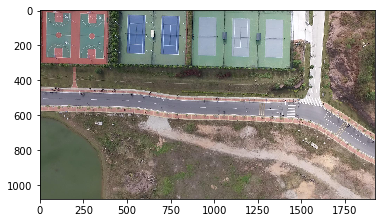

In [9]:
plt.imshow(Image.open(img_folder_path+"/"+files[0]))
plt.savefig('sample_orig_img.png')

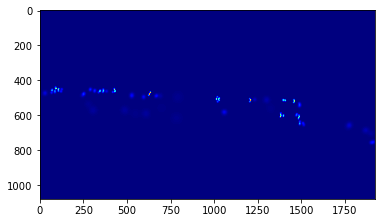

In [10]:
gt_file = h5py.File(files[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [11]:
np.sum(groundtruth)

118.58725

In [12]:
train = os.path.join(root,'/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/sequences')
test = os.path.join(root,'/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/test/sequences')
path_sets = [train,test]

In [13]:
img_folder_paths=[]
for path, dirs, files in os.walk(path_sets[0]):
    for d in dirs:
      img_folder_paths.append(path_sets[0]+"/"+d)
print(len(img_folder_paths))

82


In [14]:
for img_folder_path in img_folder_paths:
  print(img_folder_path)
  for path, dirs, files in os.walk(img_folder_path):
    for img_path in files:
      #img= cv2.imread(img_folder_path+"/"+img_path)
      img = plt.imread(img_folder_path+"/"+img_path)
      print(img_path)
      k = np.zeros((img.shape[0],img.shape[1]))
      annotation = img_path.replace('.jpg','')
      pos = 0
      #nombre de l'image
      for nbr in annotation:
        if nbr != '0':
          annotation = annotation[pos:]
          break
        pos+=1
      with open(img_folder_path.replace('sequences','annotations')+".txt", "r") as file_annota:
        print(img_folder_path.replace('sequences','annotations')+".txt")
        lines = file_annota.readlines()
        
    for ligne in lines:
        line = ligne.strip()
        line = line.split(",")
        line = list(map(int, line))
        if line[0] == int(annotation):
            k[line[2], line[1]] = 1
    print(k)
    start_time = time.time()
    k = gaussian_filter(k,15)
    print("Temps d execution : %s secondes ---" % (time.time() - start_time))
    img_arg = img_path.replace('.jpg','.h5').replace('00012','000122')
    with h5py.File(img_arg, 'w') as hf:
        hf['density'] = k
    break


/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/sequences/00031
00025.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00019.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00018.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00030.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00024.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00026.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00027.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00023.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00022.jpg
/u/s/s/ssrinivasan/private/CS639Project/CS639-Final-Project/train/annotations/00031.txt
00008.jpg
/u/s/s/ssrinivasan/private

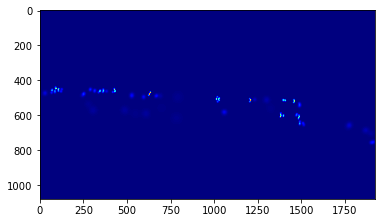

In [15]:
gt_file = h5py.File(files[0].replace('.jpg','.h5').replace('00012','000122'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [16]:
np.sum(groundtruth)

118.58725